In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("C:\\Users\\hp\\Downloads\\Copy of house_price.csv")

In [3]:
df.shape

(1000, 7)

In [4]:
df.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [5]:
df.tail()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
995,Bommanahalli,3,1,1460,1,2,25000
996,Whitefield,3,0,2100,1,7,28000
997,Bommanahalli,2,0,1033,5,0,16500
998,Bommanahalli,3,0,1500,10,1,22000
999,Whitefield,3,1,1768,5,11,30000


In [6]:
df=df.drop(columns=['Location'])
print(df)

     BHK  Furnishing  Sq.ft  Old(years)  Floor  Price
0      3           1   3000           1      3  28000
1      3           1   1650          10      0  18000
2      2           0   1000           5      3  16400
3      3           0   1600           1      9  27000
4      2           1   1200           5      1  20000
..   ...         ...    ...         ...    ...    ...
995    3           1   1460           1      2  25000
996    3           0   2100           1      7  28000
997    2           0   1033           5      0  16500
998    3           0   1500          10      1  22000
999    3           1   1768           5     11  30000

[1000 rows x 6 columns]


In [7]:
df.dtypes

BHK           int64
Furnishing    int64
Sq.ft         int64
Old(years)    int64
Floor         int64
Price         int64
dtype: object

In [8]:
df['BHK'].value_counts()

2    564
3    436
Name: BHK, dtype: int64

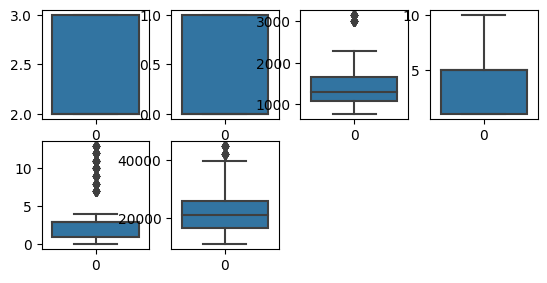

In [10]:
import seaborn as sns
n = 1
for x in df.columns:
    plt.subplot(3,4,n)
    sns.boxplot(df[x])
    n+=1
plt.show()

In [11]:
# extracting x and y from the df
x  = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [12]:
# splitting the x and y into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
# creating and train the decision tree model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=8)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

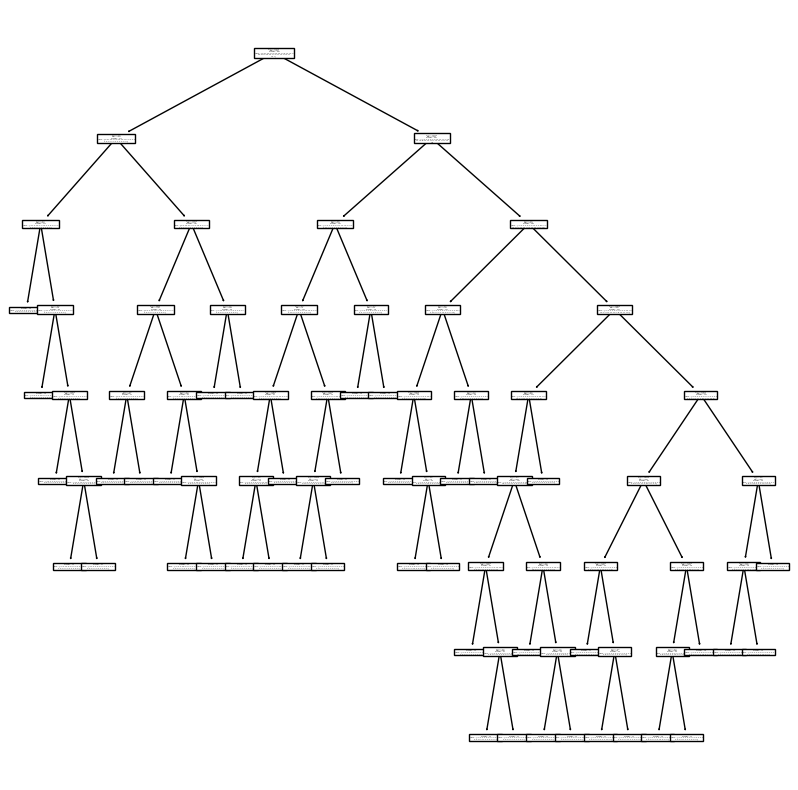

In [14]:
# plotting the decision
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(clf)
plt.show()

0.985


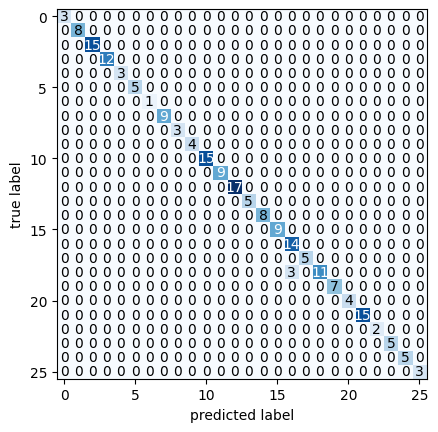

In [15]:
# evaluating the model
from sklearn.metrics import accuracy_score,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm)
plt.show()


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
svm = SVC(kernel='rbf',random_state=0)
knc = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
lrc = LogisticRegression()
dtc = DecisionTreeClassifier(max_depth=8)

In [23]:
print('logistic regression cross validation score')
print(cross_val_score(lrc,x,y,scoring='accuracy',cv=10).mean())

logistic regression cross validation score


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

0.32


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [24]:
print('KNN cross validation score')
print(cross_val_score(knc,x,y,scoring='accuracy',cv=10).mean())

KNN cross validation score
1.0


In [25]:
print('SVM cross validation score')
print(cross_val_score(svm,x,y,scoring='accuracy',cv=10).mean())

SVM cross validation score
0.29900000000000004


In [26]:
print('decision tree cross validation score')
print(cross_val_score(dtc,x,y,scoring='accuracy',cv=10).mean())

decision tree cross validation score
0.969
